### Import and QA Data

In [1]:
import pandas as pd

In [2]:
## Import the data from both tabs in the "Bank_Churn_Messy" Excel file

In [3]:
churn_cust_info = pd.read_excel("Bank_Churn_Messy.xlsx",sheet_name=0)

churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
churn_acct_info = pd.read_excel("Bank_Churn_Messy.xlsx",sheet_name=1)

churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [5]:
## Use a left join to join "Account_Info" to "Customer_Info" using the CustomerID column

In [6]:
churn_df = churn_cust_info.merge(churn_acct_info, how = "left",  on = "CustomerId")

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [7]:
## Check for and remove duplicate rows and columns

In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [9]:
churn_df[churn_df.duplicated(keep=False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [10]:
churn_df = churn_df.drop("Tenure_x", axis = 1).rename(columns={"Tenure_y":"Tenure"}).drop_duplicates()

churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,€93826.63,€0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,€79084.1,€125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,€96270.64,€0.0,2,No,5,No,0
9997,15569892,Johnstone,516,French,Male,35.0,€101699.77,€57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,€42085.58,€0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,€92888.52,€75075.31,2,No,3,No,1


### Clean the data

In [11]:
## Check the data types for each column and make any necessary fixes

In [12]:
churn_df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
EstimatedSalary     object
Balance             object
NumOfProducts        int64
HasCrCard           object
Tenure               int64
IsActiveMember      object
Exited               int64
dtype: object

In [13]:
churn_df["EstimatedSalary"]

0        €101348.88
2        €112542.58
3        €113931.57
4         €93826.63
5          €79084.1
            ...    
9996      €96270.64
9997     €101699.77
9998      €42085.58
9999      €92888.52
10000     €38190.78
Name: EstimatedSalary, Length: 10000, dtype: object

In [14]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].str.replace("€","").astype("float")

churn_df["Balance"] = churn_df["Balance"].str.replace("€","").astype("float")

In [15]:
churn_df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
EstimatedSalary    float64
Balance            float64
NumOfProducts        int64
HasCrCard           object
Tenure               int64
IsActiveMember      object
Exited               int64
dtype: object

In [16]:
# Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median

In [17]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   EstimatedSalary  10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  Tenure           10000 non-null  int64  
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [18]:
churn_df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure             0
IsActiveMember     0
Exited             0
dtype: int64

In [19]:
churn_df.isna().any(axis=1)

0        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [20]:
churn_df[churn_df.isna().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,-999999.0,141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,-999999.0,120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,-999999.0,0.00,1,Yes,2,Yes,0


In [21]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,-999999.0,141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,-999999.0,120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,-999999.0,0.00,1,Yes,2,Yes,0


In [22]:
churn_df = churn_df.fillna(value={"Surname":"MISSING","Age":churn_df["Age"].median()})

churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,93826.63,0.00,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,96270.64,0.00,2,No,5,No,0
9997,15569892,Johnstone,516,French,Male,35.0,101699.77,57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,42085.58,0.00,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,92888.52,75075.31,2,No,3,No,1


In [23]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   EstimatedSalary  10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  Tenure           10000 non-null  int64  
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [24]:
churn_df.iloc[[28,121,9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,-999999.0,141349.43,1,Yes,3,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,-999999.0,120193.42,1,No,6,No,0
9390,15756954,MISSING,538,France,Female,37.0,-999999.0,0.00,1,Yes,2,Yes,0


In [25]:
## Profile the numeric columns in the data. Are there any extreme or non-sensical values? If so, impute them with the median of the column

churn_df.describe()

,CustomerId,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,99762.195289,76485.889288,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.487552,60583.863580,62397.405202,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,-999999.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,50910.677500,0.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,100191.725000,97198.540000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,149388.247500,127644.240000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,199992.480000,250898.090000,4.000000,10.000000,1.000000


In [26]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,93826.63,0.00,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


In [27]:
churn_df["EstimatedSalary"].median()

100191.725

In [28]:
import numpy as np

In [29]:
churn_df["EstimatedSalary"] = np.where(churn_df["EstimatedSalary"]== -999999.000000, churn_df["EstimatedSalary"].median(), churn_df["EstimatedSalary"])

In [30]:
churn_df.describe()

,CustomerId,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,100092.252506,76485.889288,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.487552,57510.146401,62397.405202,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,51002.110000,0.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,100196.062500,97198.540000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,149388.247500,127644.240000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,199992.480000,250898.090000,4.000000,10.000000,1.000000


In [31]:
## Combine any variations in country names in the "Geography" column to a single value per country

churn_df["Geography"].value_counts()

Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: Geography, dtype: int64

In [32]:
churn_df[churn_df["Geography"].isin(["France", "French","FRA"])]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
3,15619304,Onio,502,French,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,93826.63,0.00,2,No,1,No,0
7,15592531,Bartlett,822,France,Male,50.0,10062.80,0.00,2,Yes,7,Yes,0
9,15792365,He,501,French,Male,44.0,74940.50,142051.07,2,Yes,4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15719294,Wood,800,France,Female,29.0,167773.55,0.00,2,No,2,No,0
9996,15606229,Obijiaku,771,France,Male,39.0,96270.64,0.00,2,No,5,No,0
9997,15569892,Johnstone,516,French,Male,35.0,101699.77,57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,42085.58,0.00,1,Yes,7,Yes,1


In [33]:
churn_df["Geography"] = np.where(churn_df["Geography"].isin(["France", "French","FRA"]), "France", churn_df["Geography"])

churn_df["Geography"]

0         France
2          Spain
3         France
4         France
5          Spain
          ...   
9996      France
9997      France
9998      France
9999     Germany
10000     France
Name: Geography, Length: 10000, dtype: object

In [34]:
churn_df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Explore the data

In [35]:
## Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)

In [36]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


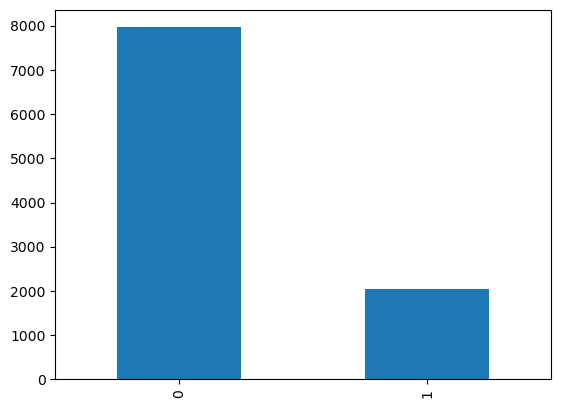

In [37]:
churn_df["Exited"].value_counts().plot.bar();

In [38]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


In [39]:
## Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”

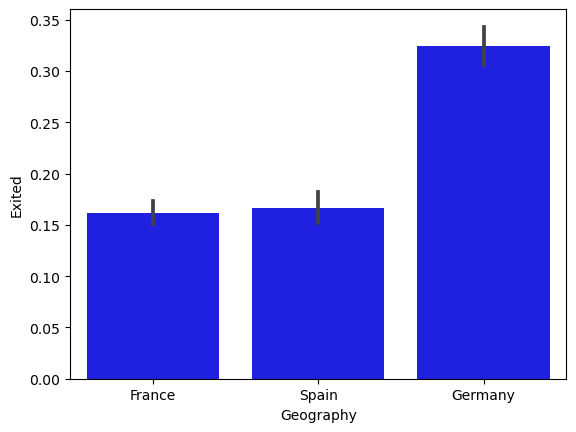

In [40]:
import seaborn as sns

sns.barplot(data=churn_df, x="Geography", y="Exited", color="blue");

In [41]:
churn_df.select_dtypes("object")

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,Hargrave,France,Female,Yes,Yes
2,Hill,Spain,Female,Yes,Yes
3,Onio,France,Female,No,No
4,Boni,France,Female,No,No
5,Mitchell,Spain,Female,Yes,Yes
...,...,...,...,...,...
9996,Obijiaku,France,Male,No,No
9997,Johnstone,France,Male,Yes,Yes
9998,Liu,France,Female,Yes,Yes
9999,Sabbatini,Germany,Male,No,No


In [42]:
churn_df.drop("Surname", axis=1).select_dtypes("object")

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,Yes,Yes
2,Spain,Female,Yes,Yes
3,France,Female,No,No
4,France,Female,No,No
5,Spain,Female,Yes,Yes
...,...,...,...,...
9996,France,Male,No,No
9997,France,Male,Yes,Yes
9998,France,Female,Yes,Yes
9999,Germany,Male,No,No


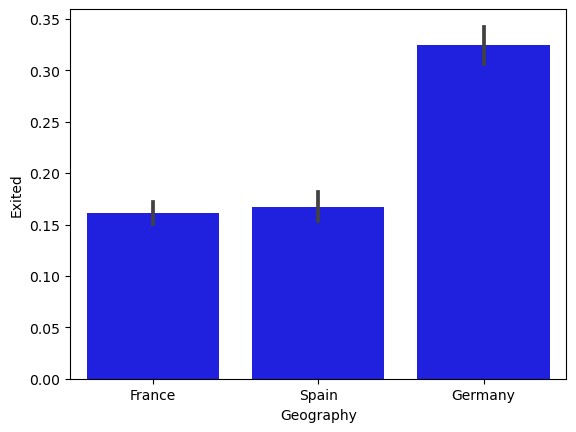

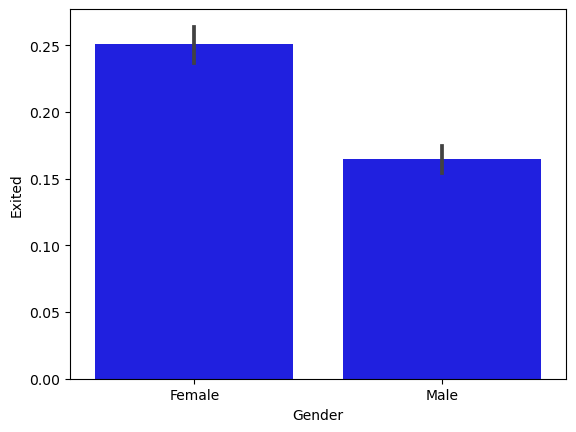

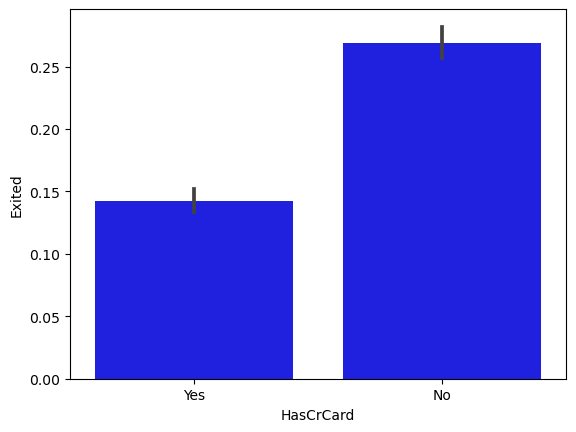

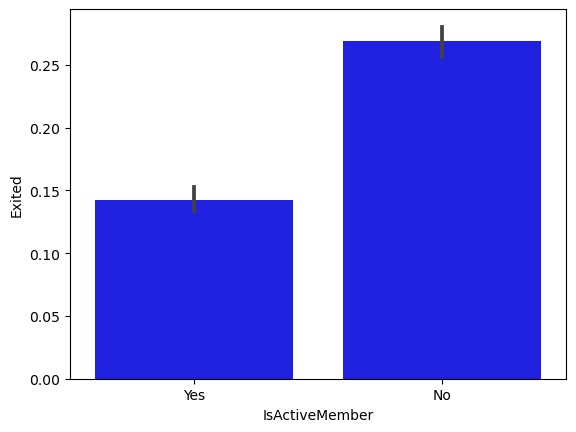

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in churn_df.drop("Surname", axis=1).select_dtypes("object"):
    sns.barplot(data=churn_df, x=col, y="Exited", color="blue")
    plt.show()

In [44]:
## Build box plots for each numeric field, broken out by churners vs. non-churners

<Axes: ylabel='Age'>

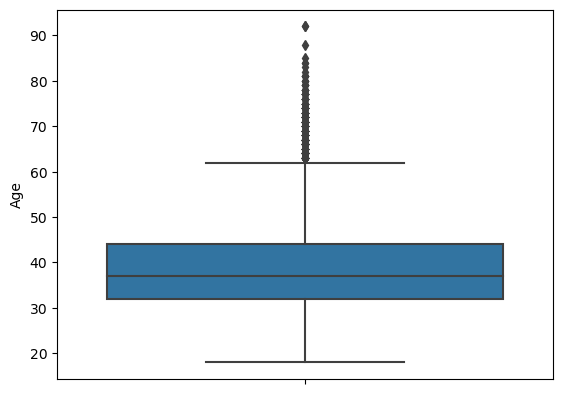

In [45]:
sns.boxplot(data=churn_df, y="Age", hue="Exited")

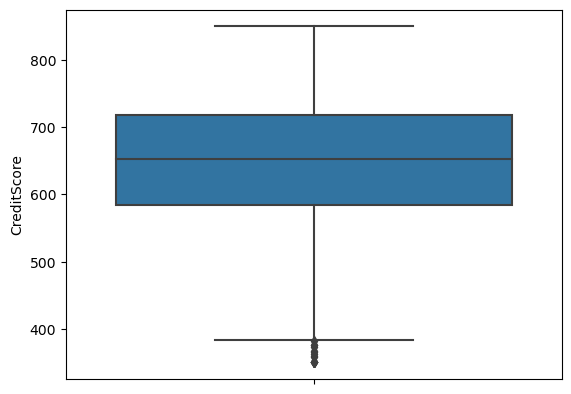

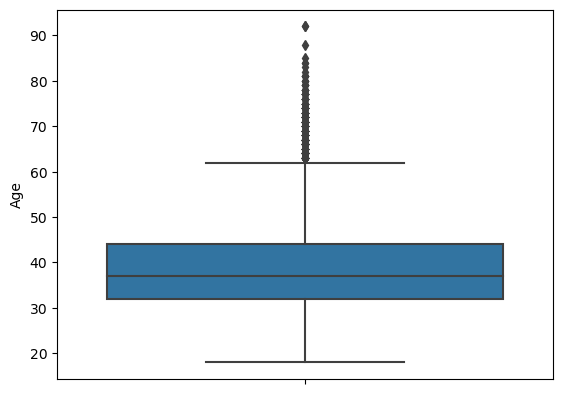

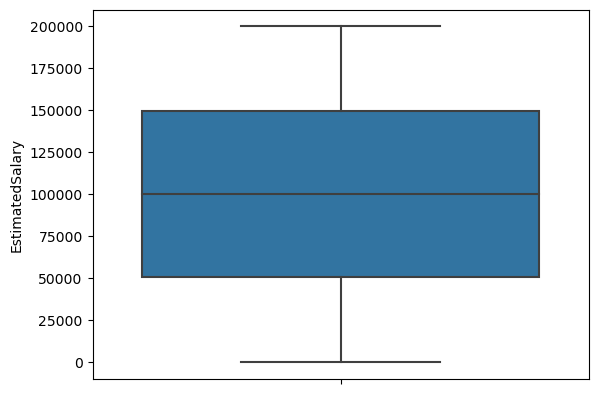

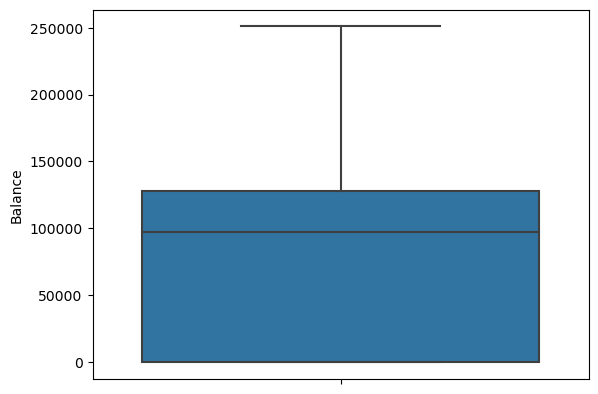

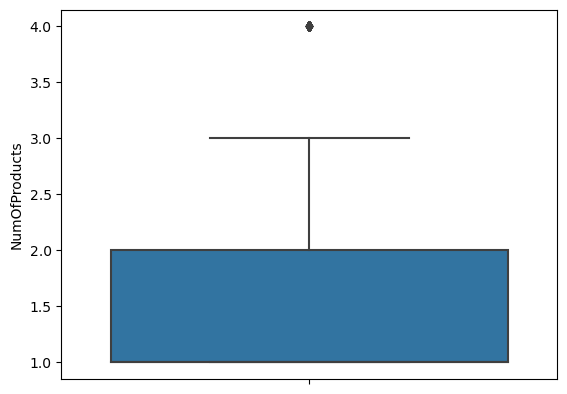

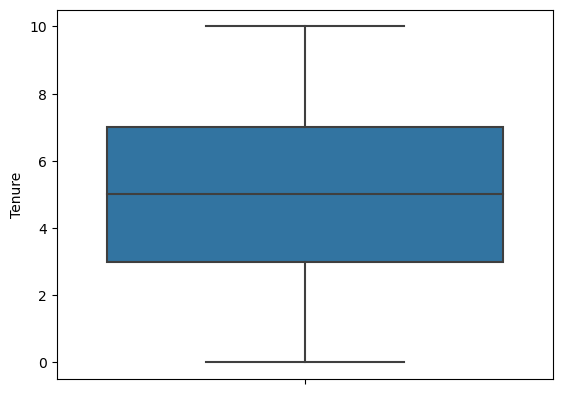

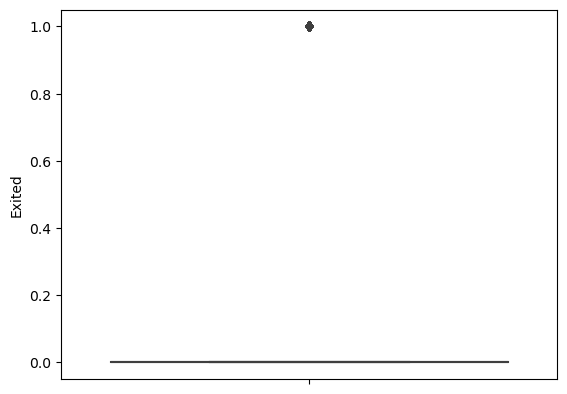

In [46]:
for col in churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.boxplot(data=churn_df, y=col, hue="Exited")
    plt.show()

In [47]:
## Build histograms for each numeric field, broken out by churners vs. non-churners

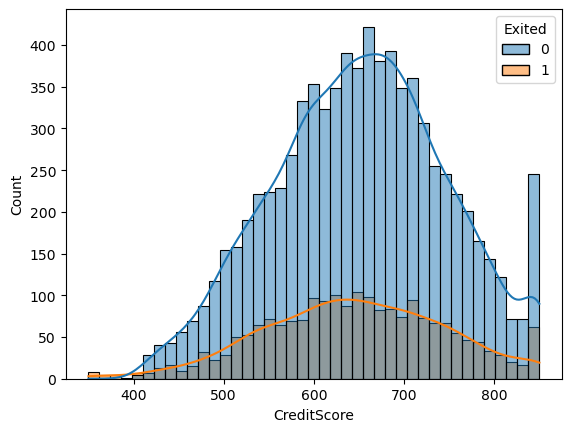

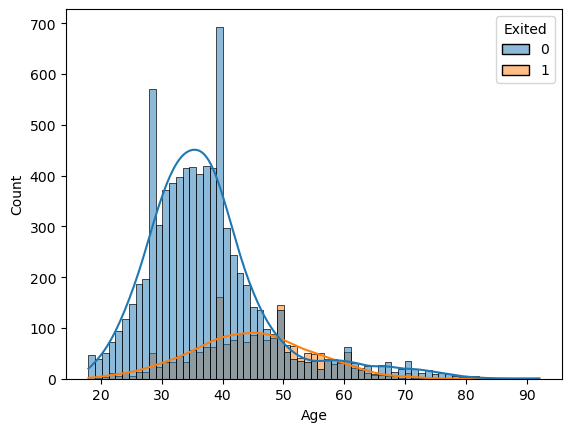

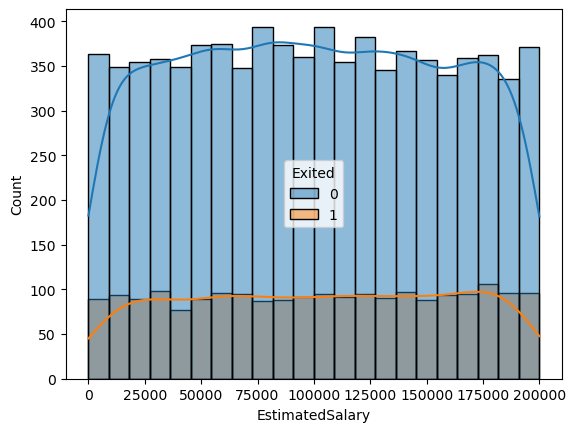

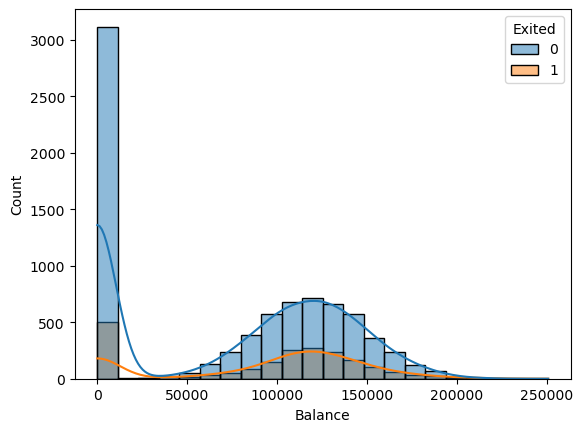

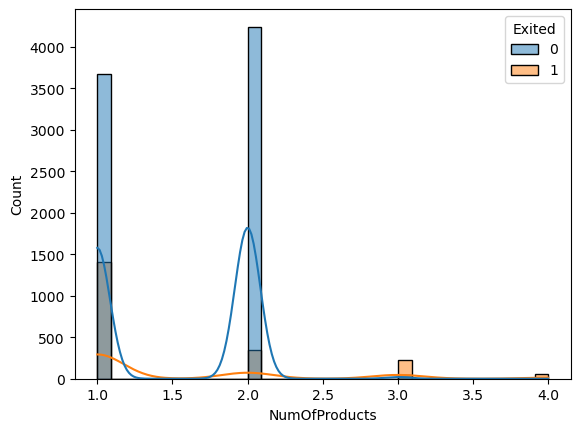

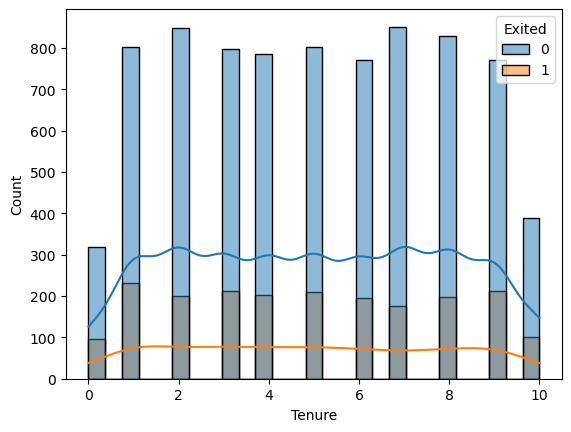

C:\Users\sriki\anaconda3\Lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sriki\anaconda3\Lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


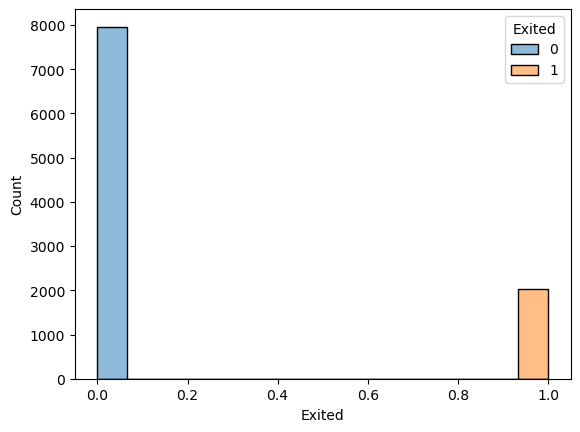

In [48]:
for col in churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.histplot(data=churn_df, x=col, hue="Exited", kde=True)
    plt.show()

### Prepare the data for modeling

In [49]:
## Final objective is to prepare the data for modeling through feature selection, feature engineering, and data splitting

In [50]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


In [51]:
## Create a new dataset that excludes any columns that aren’t be suitable for modeling

modelling_df = churn_df.drop(["CustomerId", "Surname"], axis=1)

modelling_df.head()

,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0
5,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


In [52]:
## Create dummy variables for categorical fields

modelling_df = pd.get_dummies(modelling_df, drop_first=True)

modelling_df.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,101348.88,0.00,1,2,1,0,0,0,1,1
2,608,41.0,112542.58,83807.86,1,1,0,0,1,0,1,1
3,502,42.0,113931.57,159660.80,3,8,1,0,0,0,0,0
4,699,39.0,93826.63,0.00,2,1,0,0,0,0,0,0
5,850,43.0,79084.10,125510.82,1,2,0,0,1,0,1,1


In [53]:
## Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary

In [54]:
modelling_df["balance_v_sal"] = modelling_df["Balance"]/modelling_df["EstimatedSalary"]

modelling_df.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,balance_v_sal
0,619,42.0,101348.88,0.00,1,2,1,0,0,0,1,1,0.000000
2,608,41.0,112542.58,83807.86,1,1,0,0,1,0,1,1,0.744677
3,502,42.0,113931.57,159660.80,3,8,1,0,0,0,0,0,1.401375
4,699,39.0,93826.63,0.00,2,1,0,0,0,0,0,0,0.000000
5,850,43.0,79084.10,125510.82,1,2,0,0,1,0,1,1,1.587055


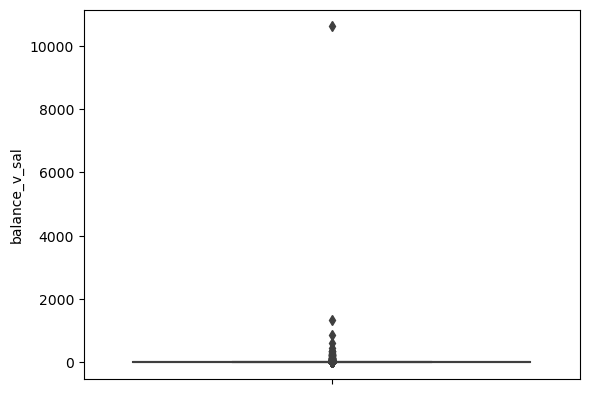

In [55]:
sns.boxplot(data=modelling_df, y="balance_v_sal");

In [56]:
modelling_df.describe()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,balance_v_sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,100092.252506,76485.889288,1.530200,5.012800,0.203700,0.250900,0.247700,0.545700,0.515100,0.515100,3.878703
std,96.653299,10.487552,57510.146401,62397.405202,0.581654,2.892174,0.402769,0.433553,0.431698,0.497932,0.499797,0.499797,108.337260
min,350.000000,18.000000,11.580000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,51002.110000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,100196.062500,97198.540000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.747002
75%,718.000000,44.000000,149388.247500,127644.240000,2.000000,7.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.514022
max,850.000000,92.000000,199992.480000,250898.090000,4.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10614.655440


In [58]:
## Visualize that feature vs. churn status

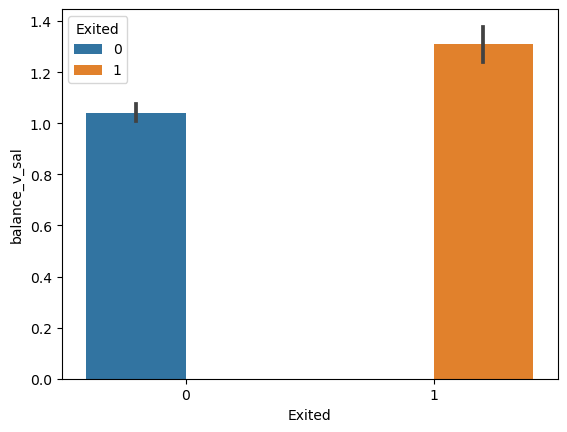

In [60]:
sns.barplot(data=modelling_df.query("balance_v_sal < 10"), x = "Exited", y = "balance_v_sal", hue = "Exited");